# Gyógyszerstatisztikák NEAK-adatok alapján


## Három eredeti elemzési cél:


1. hosszútávú (12 éves) leírása a támogatott gyógyszerforgalomnak
2. a friss adatok alapján gyorsjelentések készítése és posztolása a megjelenés után órákkal 
3. a COVID-pandémia kapcsán az elmúlt 5 év áttekintése többféle szempontból


In [1]:
import pyodbc
import pandas as pd
import numpy as np
import os
import sqlite3
from datetime import datetime, timezone
import matplotlib.pyplot as plt

%matplotlib inline

## 1. hosszútávú (12 éves) leírás

In [20]:
path = "C:\neak_source"

In [2]:
# betöltési logok előszedése

df1 = pd.read_csv("already_processed_log_200612.csv", sep=";")
df2 = pd.read_csv("already_processed_log_200712.csv", sep=";")
df3 = pd.read_csv("already_processed_log_200912.csv", sep=";")
df4 = pd.read_csv("already_processed_log_201112.csv", sep=";")
df5 = pd.read_csv("already_processed_log_201412.csv", sep=";")
df6 = pd.read_csv("already_processed_log_201712.csv", sep=";")
df7 = pd.read_csv("already_processed_log_202205.csv", sep=";")

In [4]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7]).reset_index(drop = True)

In [6]:
df['sourceRecordNumber'].sum()

23656578

In [7]:
# CSV állomány legyártása a Power BI vizualizáció részére

df.to_csv("already_scanned.csv", sep=";", encoding='utf-8', index=False)

In [ ]:
df.groupby('year')['sourceRecordNumber'].sum()

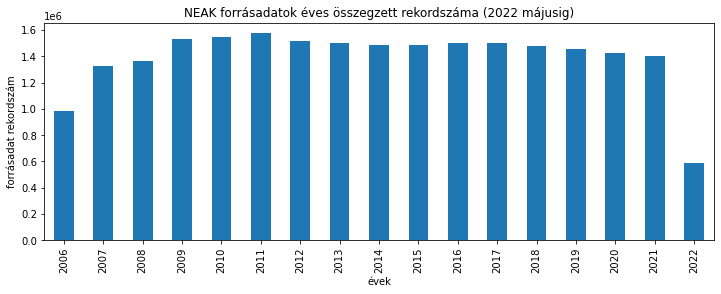

In [9]:
df.groupby('year')['sourceRecordNumber'].sum().plot(kind='bar', figsize=(12, 4))
plt.xlabel('évek')
plt.ylabel('forrásadat rekordszám')
plt.title('NEAK forrásadatok éves összegzett rekordszáma (2022 májusig)')
# plt.savefig("neak1.png")

In [ ]:
# SQLITE adatbázis visszaolvasása

In [2]:
db = sqlite3.connect('neak2.sqlite3')

In [11]:
q = "select * from records_number"
df = pd.read_sql(q, db)

In [17]:
# CSV állomány legyártása a Power BI vizualizáció részére

df.to_csv("records_number.csv", sep=";", encoding='utf-8', index=False)

In [13]:
q = "select * from years"
dfyears = pd.read_sql(q, db)

In [19]:
# CSV állomány legyártása a Power BI vizualizáció részére

dfyears.to_csv("df_years.csv", sep=";", encoding='utf-8', index=False)

In [3]:
q = "select * from atc"
df = pd.read_sql(q, db)

In [12]:
df['atc3'] = df['atc'].str.slice(0, 3)

In [14]:
df.to_csv("atc.csv", sep=";", encoding='utf-8', index=False)

In [15]:
q = "select * from atc3"
df = pd.read_sql(q, db)

In [18]:
df.to_csv("atc3.csv", sep=";", encoding='utf-8', index=False)

In [19]:
db.close()